# Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


In [2]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
df.shape

(247, 14)

In [4]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

# Info about dataset and its attributes
1. The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
2. 122 instances for each region.
3. The period from June 2012 to September 2012.
4. The dataset includes 11 attribues and 1 output attribue (class)
5. The 244 instances have been classified into fire (138 classes) and notfire (106 classes) classes.



Attributes

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) 

Weather data observations

1. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
2. RH : Relative Humidity in %: 21 to 90
3. Ws :Wind speed in km/h: 6 to 29
4. Rain: total day in mm: 0 to 16.8

FWI Components Out[88]:

1. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
2. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
3. Drought Code (DC) index from the FWI system: 7 to 220.4
4. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
5. Buildup Index (BUI) index from the FWI system: 1.1 to 68
6. Fire Weather Index (FWI) Index: 0 to 31.1
7. Classes: two classes, namely fire encoded as 1 and not fire encoded as 0

# 2 Data Cleaning

Dropping row no 122 specifying region name & 123 respecifying the header

In [5]:
df.drop([122,123],inplace=True)

Resetting the index and dropping the index column

In [6]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

Creating a new column called Region reprenting [0:- Bejaia and 1- Sidi Bel-abbes]

In [7]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

Checking the Column Headers

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

Removing unnecessary space in column headers using str.strip()

In [9]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Dropping rows with null values

In [10]:
df.dropna(inplace=True)

Converting the necessary column dataye to int

In [11]:
df.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [12]:
df.drop([122,123],inplace=True)

In [13]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]]=df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws',"Region"]].astype('int64')

In [14]:
df[df['day']=='day']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [15]:
df.dtypes

day             int64
month           int64
year            int64
Temperature     int64
RH              int64
Ws              int64
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

Values in df[Classes] has unnecessary spaces that are removed by str.strip()

In [16]:
df.Classes.unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [17]:
df['Classes']=df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

Converting the Necessary Column Datatype to Float

In [18]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype('float64')

In [19]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

Dropping the year column as the data is for the same year

In [20]:
df1=df.drop(['year'],axis=1)

DataFrame Description

In [21]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
day,242.0,15.822314,8.809501,1.0,8.000,16.00,23.000,31.0
month,242.0,7.508264,1.112888,6.0,7.000,8.00,8.000,9.0
Temperature,242.0,32.152893,3.635545,22.0,30.000,32.00,35.000,42.0
RH,242.0,62.004132,14.847635,21.0,52.250,63.00,73.750,90.0
Ws,242.0,15.508264,2.808171,6.0,14.000,15.00,17.000,29.0
Rain,242.0,0.763223,2.007354,0.0,0.000,0.00,0.500,16.8
FFMC,242.0,77.928099,14.316912,28.6,72.375,83.50,88.300,96.0
DMC,242.0,14.730992,12.393811,0.7,5.800,11.30,20.850,65.9
DC,242.0,49.601240,47.690192,6.9,14.325,33.25,70.050,220.4
ISI,242.0,4.759504,4.154248,0.0,1.400,3.50,7.275,19.0


# 3. Exploratory Data Analysis

In [22]:
df1[df1['Classes']=='not fire']

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
8,9,6,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0
9,10,6,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,0
12,13,6,27,84,21,1.2,50.0,6.7,17.0,0.5,6.7,0.2,not fire,0
13,14,6,30,78,20,0.5,59.0,4.6,7.8,1.0,4.4,0.4,not fire,0
14,15,6,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,not fire,0


In [23]:
df1["Classes"]=df1["Classes"].replace(['not fire','fire'],['1','0'])
df1.head(10)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
5,6,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,0
6,7,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0,0
7,8,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,0,0
8,9,6,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,1,0
9,10,6,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,1,0


In [24]:
df1.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
day,1.000000,-0.009796,0.097502,-0.072323,0.039560,-0.113399,0.217140,0.488513,0.525822,0.175010,0.514349,0.347035,0.007824
month,-0.009796,1.000000,-0.057232,-0.038046,-0.047156,0.034777,0.009022,0.062810,0.122326,0.060385,0.080075,0.077933,0.007503
Temperature,0.097502,-0.057232,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,0.270295
RH,-0.072323,-0.038046,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,-0.406348
Ws,0.039560,-0.047156,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,-0.176928
Rain,-0.113399,0.034777,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,-0.039965
FFMC,0.217140,0.009022,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,0.229726
DMC,0.488513,0.062810,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,0.196981
DC,0.525822,0.122326,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,-0.075412
ISI,0.175010,0.060385,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,0.268456


<Figure size 1152x576 with 0 Axes>

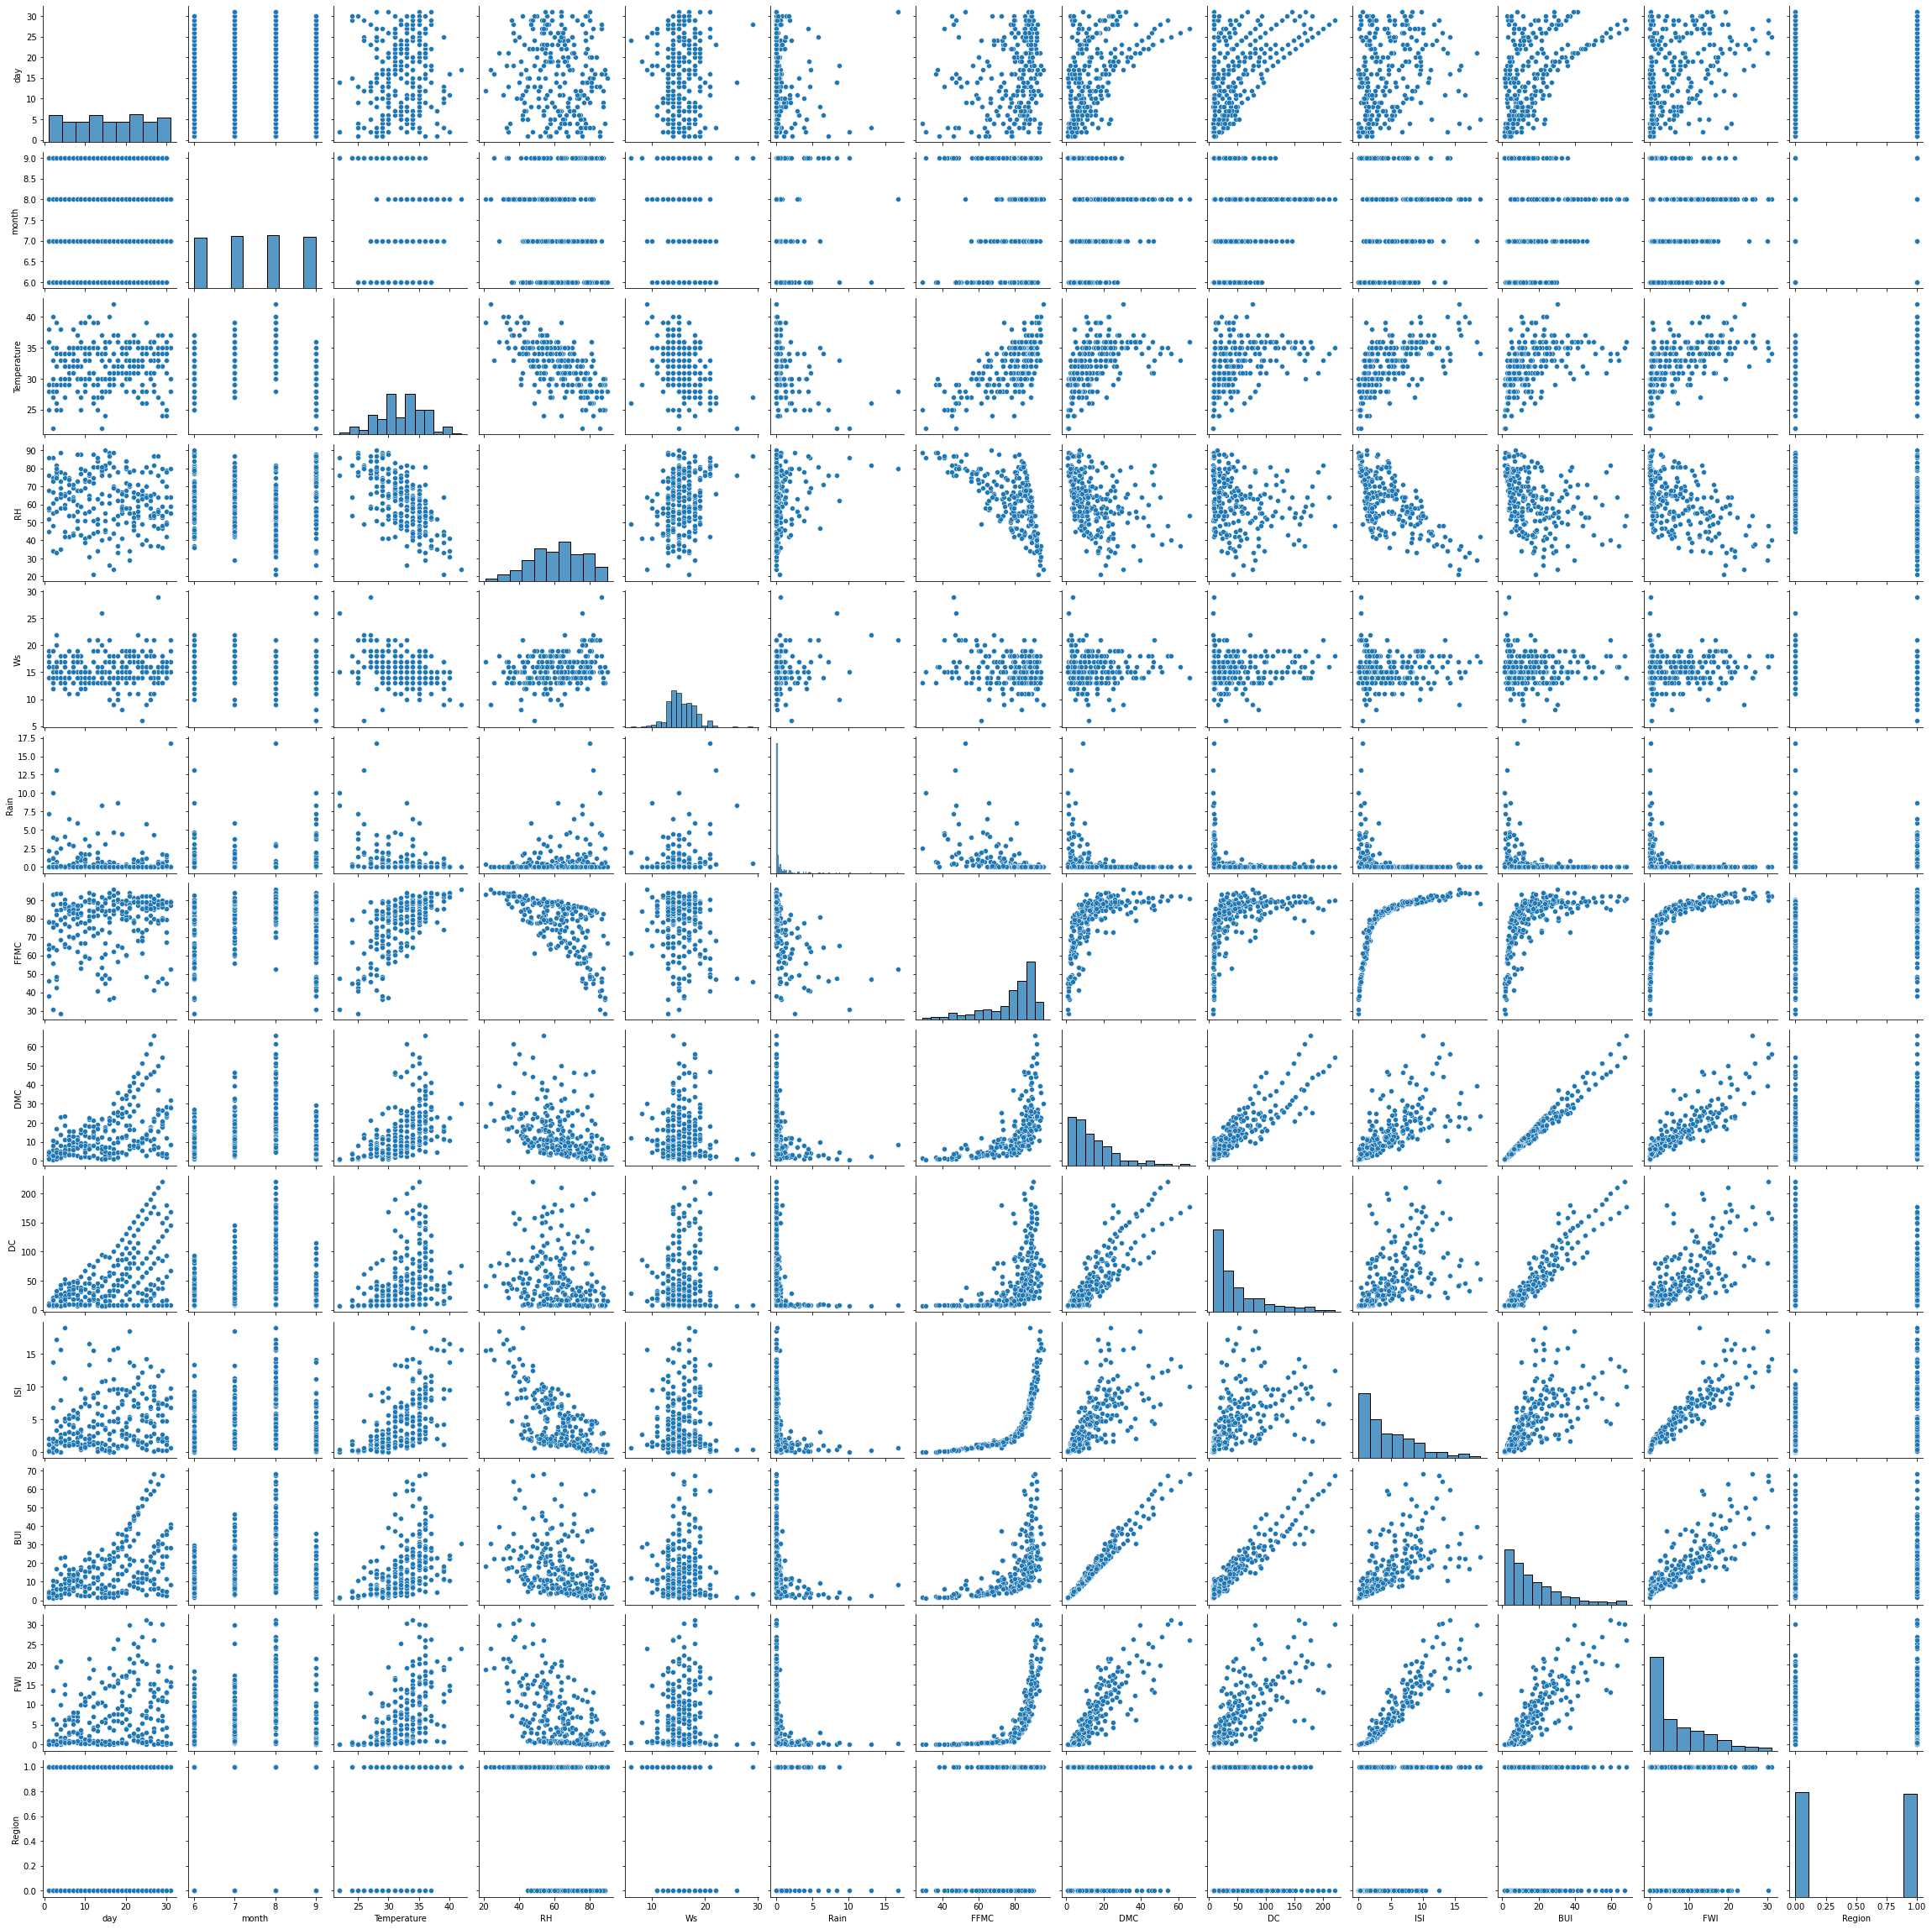

In [25]:
plt.figure(figsize=(16,8))
sns.pairplot(df1)


<AxesSubplot:>

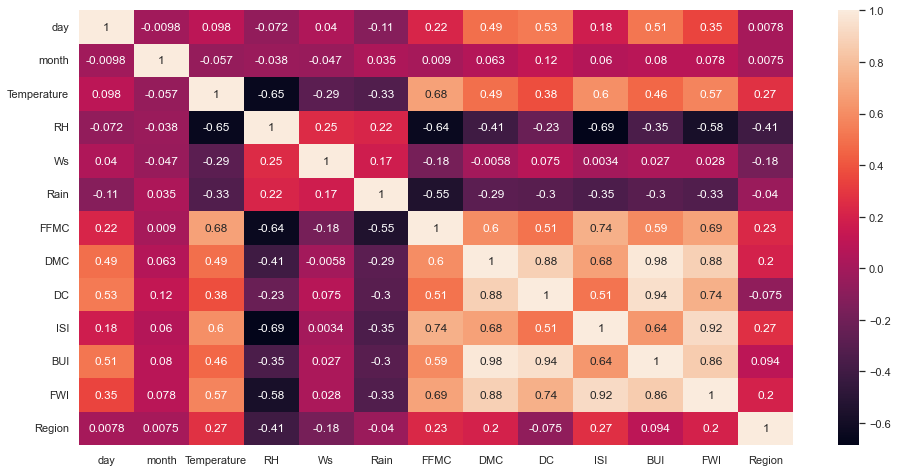

In [26]:
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(df1.corr(),annot=True)

Report
* RH is negatively corelated with Temperature, FFMC and ISI.
* Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

In [27]:
df1.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

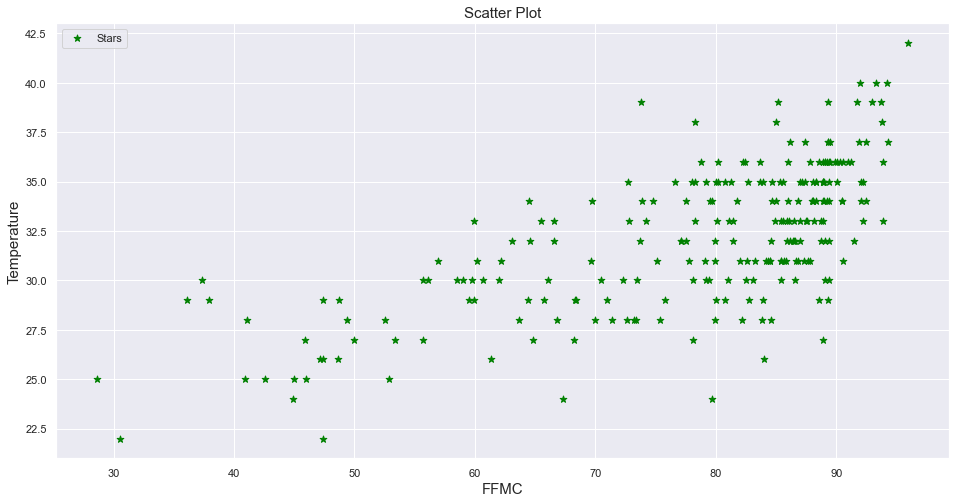

In [28]:
# FFMC (Fine Fuel Moisture Code)

plt.scatter(df1['FFMC'],df1['Temperature'],label='Stars',color='green',marker='*',s=50)
plt.xlabel("FFMC",fontsize=15)
plt.ylabel("Temperature",fontsize=15)


plt.title('Scatter Plot',fontsize='15')
plt.legend()
plt.show()

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

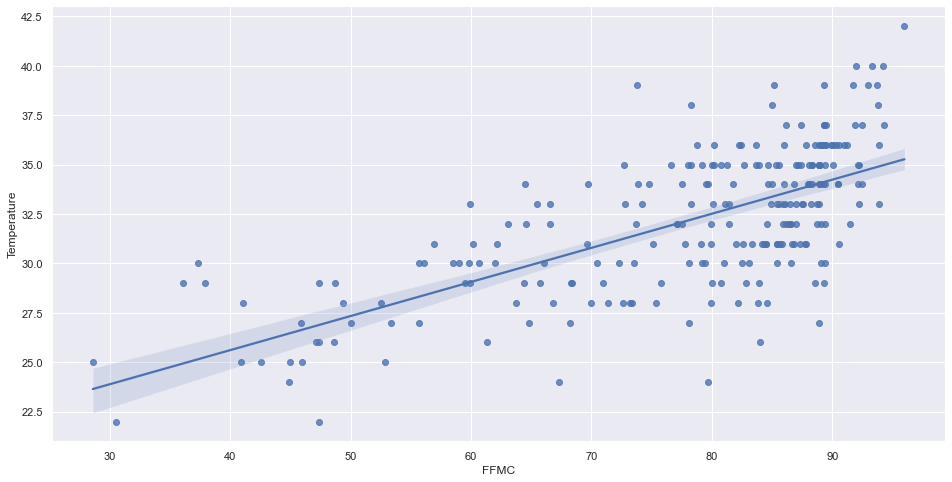

In [29]:
# FFMC (Fine Fuel Moisture Code)

sns.regplot(x='FFMC',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

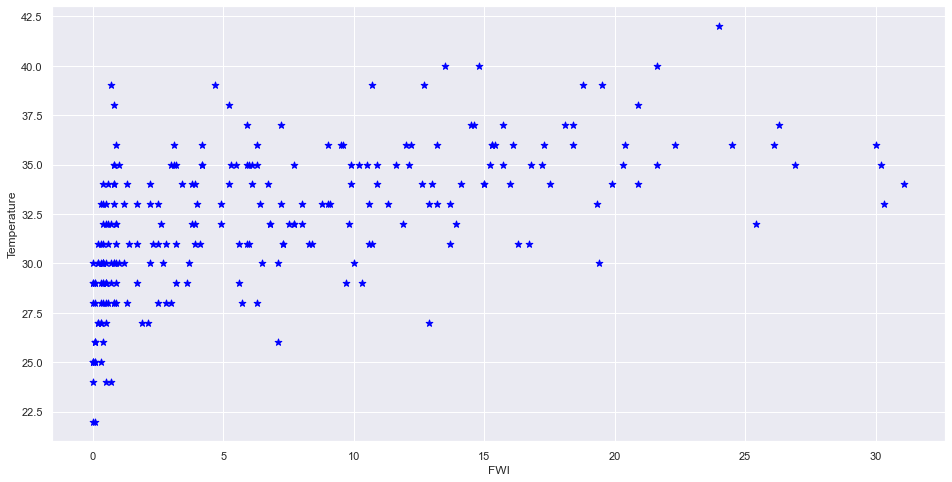

In [30]:
# FWI (Fire Weather Index)

plt.scatter(df1['FWI'],df1['Temperature'],marker="*",s=50,color='blue')
plt.xlabel("FWI")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='FWI', ylabel='Temperature'>

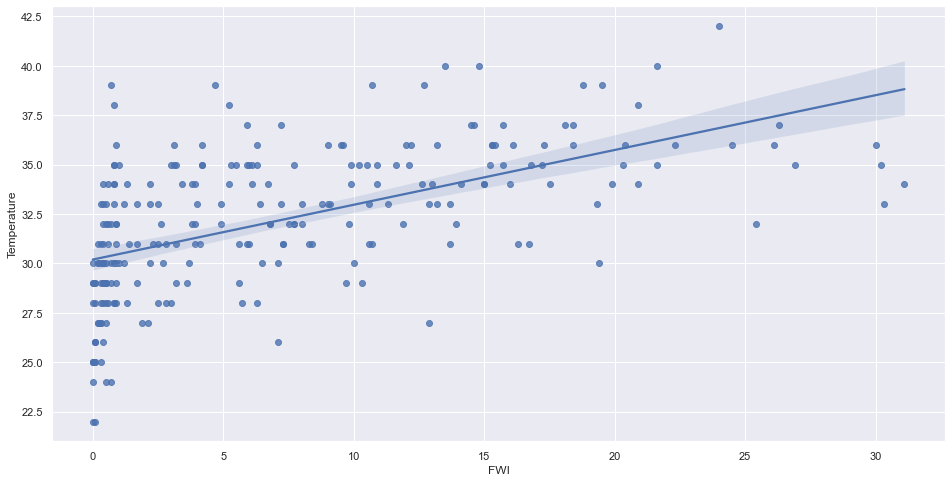

In [31]:
sns.regplot(x='FWI',y='Temperature',data=df1)

Text(0, 0.5, 'Temperature')

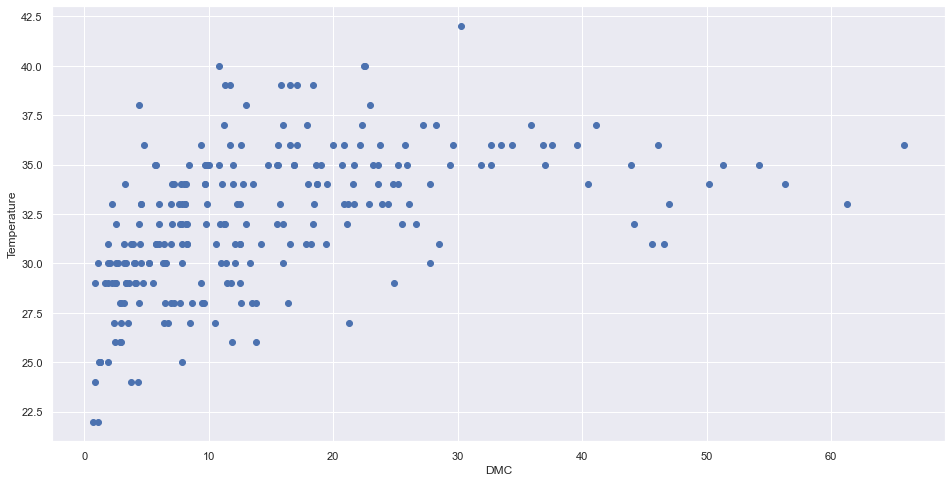

In [32]:
# DMC(Duff Moisture Code)

plt.scatter(df1['DMC'],df1['Temperature'])
plt.xlabel("DMC")
plt.ylabel("Temperature")

<AxesSubplot:xlabel='DMC', ylabel='Temperature'>

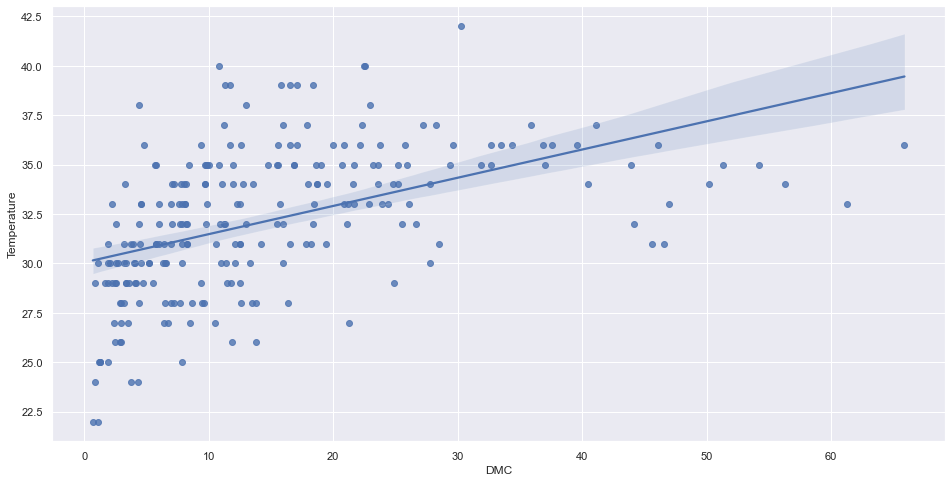

In [33]:
sns.regplot(x='DMC',y='Temperature',data=df1)

Histogram

* A histogram is basically used to represent data provided in a form of sme groups

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>],
       [<AxesSubplot:title={'center':'Region'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

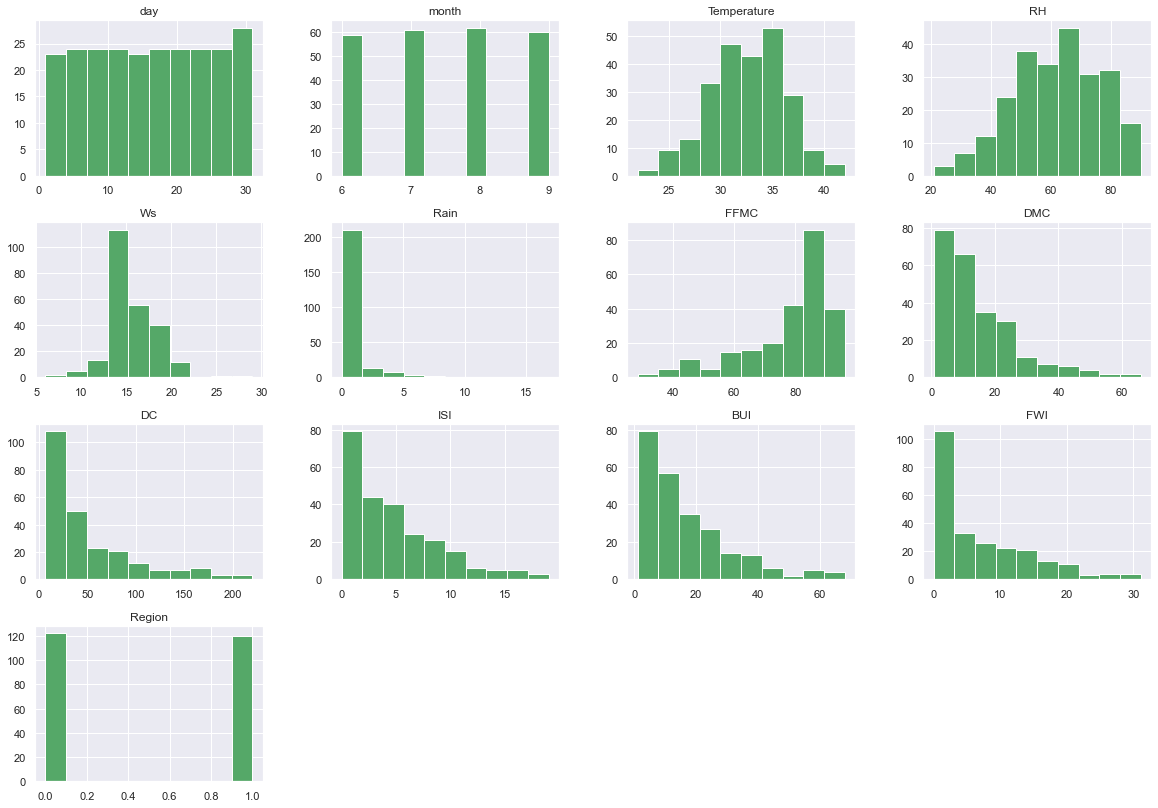

In [34]:
df1.hist(figsize=(20,14),color='g')

Percentage for Pie Chart

In [35]:
percentage=df.Classes.value_counts(normalize=True)*100
percentage

fire        56.61157
not fire    43.38843
Name: Classes, dtype: float64

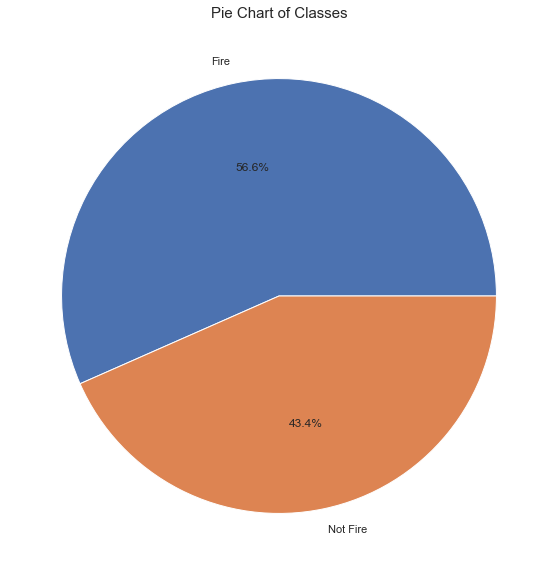

In [36]:
classes_labels=['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

Forest Fire Temperature Box Plot

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

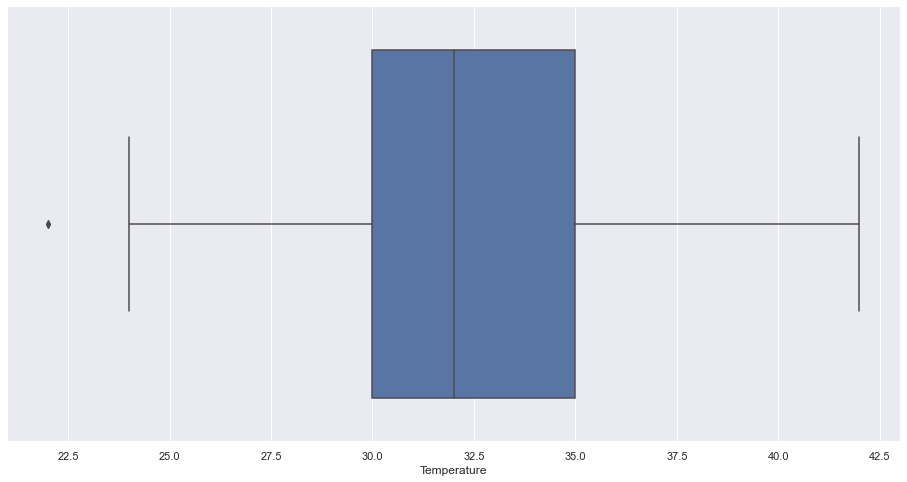

In [37]:
sns.boxplot(df1['Temperature'])

Forest Fire Weather Index System[FWI] Boxplot

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

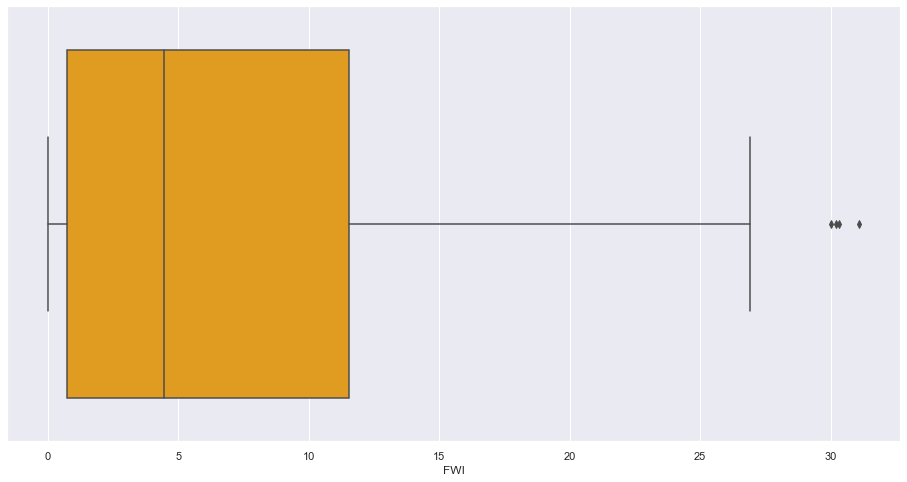

In [38]:
sns.boxplot(df['FWI'],color='orange')

# 4. Building Linear Regression Model

In [42]:
df1.head(5)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [47]:
X=df1.drop(columns=['Temperature'])
y=df1[['Temperature']]

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [55]:
X_train.head(5)

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
25,26,6,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,0,0
119,28,9,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,1,0
175,23,7,71,17,0.0,87.3,46.6,99.0,6.9,46.5,16.3,0,1
72,12,8,51,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2,1,0
232,18,9,33,13,0.1,90.6,25.8,77.8,9.0,28.2,15.4,0,1


In [56]:
X_test.head(5)

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
83,23,8,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,0,0
76,16,8,61,18,0.3,80.2,11.7,90.4,2.8,17.6,4.2,0,0
61,1,8,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,1,0
185,2,8,34,14,0.0,93.3,10.8,21.4,13.8,10.6,13.5,0,1
106,15,9,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0,1,0


In [57]:
y_train.head(5)

,Temperature
25,31
119,32
175,31
72,35
232,36


In [58]:
y_test.head(5)

,Temperature
83,36
76,36
61,36
185,40
106,24


In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()

In [66]:
X_train_scaled = scaler.fit_transform(X_train)

In [67]:
X_test_scaled = scaler.fit_transform(X_test)

# Linear Regration

Model Training

In [68]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [70]:
#print the coefficients & intercept
print(regression.coef_)

[[-0.32406286 -0.41714868 -1.2694779  -0.81916247 -0.11360814  1.03261792
   0.04624873  0.66558953  0.23801327  0.13323519 -0.40908394 -0.12026771
   0.19319137]]


In [73]:
print(regression.intercept_)

[32.06790123]


In [72]:
regression.score(X_test_scaled,y_test)

0.5112697541156213

In [79]:
reg_pred=regression.predict(X_test_scaled)

ASSUMPTIONS OF LINEAR REGRESSION

Text(0, 0.5, 'Test Predicted Data')

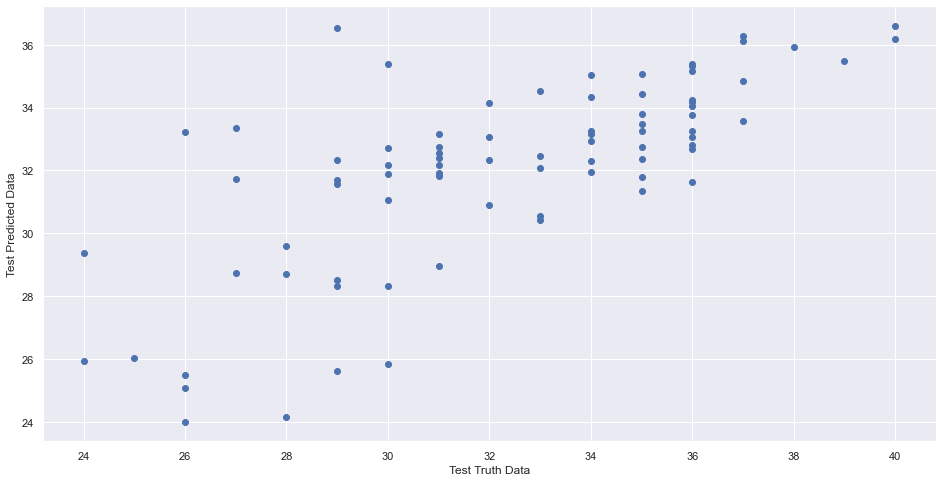

In [80]:
#if we are plotting  y_test,reg_pred relation should be linear
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [82]:
residuals=y_test-reg_pred
residuals

,Temperature
83,1.759018
76,4.376063
61,2.755345
185,3.814599
106,-1.922939
47,-1.174541
150,0.730663
189,-1.880884
134,-6.337382
117,-1.383038


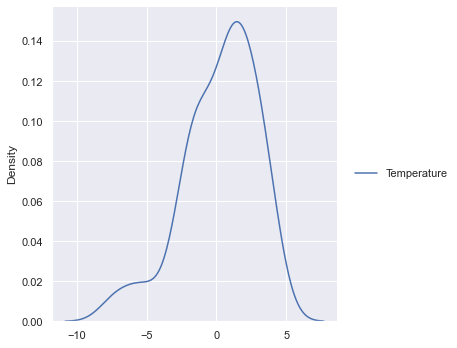

In [87]:
sns.displot(residuals,kind="kde")

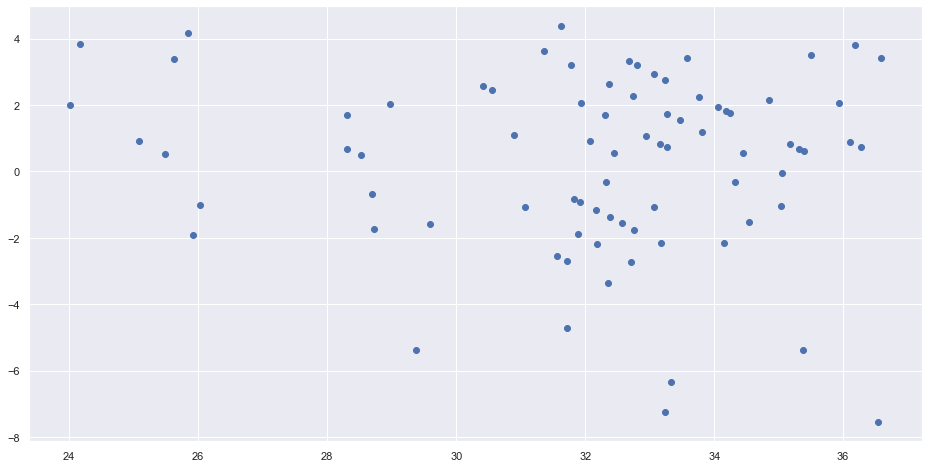

In [84]:
plt.scatter(reg_pred,residuals)

Performance Metrics

In [89]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [90]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.047184689249066
2.165036131271249
2.6546534028473596
